In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from matplotlib import pyplot as plt
from matplotlib import image as img
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

In [68]:
df = pd.read_csv('./train.csv', sep=',', parse_dates=['date']).set_index('row_id')

In [69]:
df.shape

(70128, 5)

In [70]:
df.sample(10)

,date,country,store,product,num_sold
row_id,,,,,
14551,2017-10-31,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,133
15891,2017-11-28,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,399
23163,2018-04-28,Italy,KaggleMart,Kaggle for Kids: One Smart Goose,424
43213,2019-06-20,France,KaggleRama,Kaggle Getting Started,90
57109,2020-04-04,Poland,KaggleRama,Kaggle Getting Started,77
30361,2018-09-25,Italy,KaggleMart,Kaggle Getting Started,258
63071,2020-08-06,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,135
46280,2019-08-23,France,KaggleMart,Kaggle Advanced Techniques,292
61851,2020-07-12,Italy,KaggleMart,Kaggle for Kids: One Smart Goose,469


In [71]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df.head()

,date,country,store,product,num_sold,year,month
row_id,,,,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,1
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,1
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,1


In [72]:
df['product'].unique()

array(['Kaggle Advanced Techniques', 'Kaggle Getting Started',
       'Kaggle Recipe Book', 'Kaggle for Kids: One Smart Goose'],
      dtype=object)

In [73]:
an = df.groupby('year')['month'].value_counts().unstack().fillna(0)
an

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,1488,1344,1488,1440,1488,1440,1488,1488,1440,1488,1440,1488
2018,1488,1344,1488,1440,1488,1440,1488,1488,1440,1488,1440,1488
2019,1488,1344,1488,1440,1488,1440,1488,1488,1440,1488,1440,1488
2020,1488,1392,1488,1440,1488,1440,1488,1488,1440,1488,1440,1488


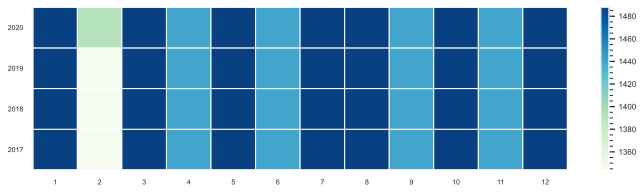

In [74]:
plt.figure(figsize=(12, 3))
plt.pcolor(an, cmap='GnBu', edgecolors='white', linewidths=1)
plt.xticks(np.arange(0.5, len(an.columns), 1), an.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(an.index), 1), an.index, fontsize=7)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

In [75]:
new = pd.pivot_table(df,
                     index=["year"],
                     values=["num_sold"],
                     columns=["month"],
                     aggfunc=[np.sum]).fillna(0)
new

sum                                                          \
      num_sold                                                           
month       1       2       3       4       5       6       7       8    
year                                                                     
2017    281848  236138  258310  260187  263435  245111  252849  251868   
2018    302617  262365  292882  289285  304079  277006  279265  280071   
2019    292424  253021  280246  272227  277554  264325  258856  260611   
2020    368039  334729  315641  254850  297769  301888  318682  323076   

                                       
                                       
month      9       10      11      12  
year                                   
2017   240947  253300  262104  306066  
2018   268034  277058  274199  318563  
2019   250657  260464  263315  299179  
2020   305244  328959  330612  375704

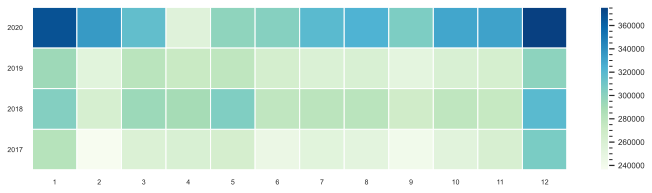

In [76]:
plt.figure(figsize=(12, 3))
plt.pcolor(new, cmap='GnBu', edgecolors='white', linewidths=1)
plt.xticks(np.arange(0.5, len(an.columns), 1), an.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(an.index), 1), an.index, fontsize=7)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

In [77]:
df_Kaggle_kids = df[df['product'] == 'Kaggle for Kids: One Smart Goose']

In [78]:
df_Kaggle_kids['date'] = pd.to_datetime(df_Kaggle_kids['date'])
series_mean = df_Kaggle_kids[['date', 'num_sold']].groupby(pd.Grouper(key='date', freq='W')).mean()
series_std = df_Kaggle_kids[['date', 'num_sold']].groupby(pd.Grouper(key='date', freq='W')).std().fillna(0)

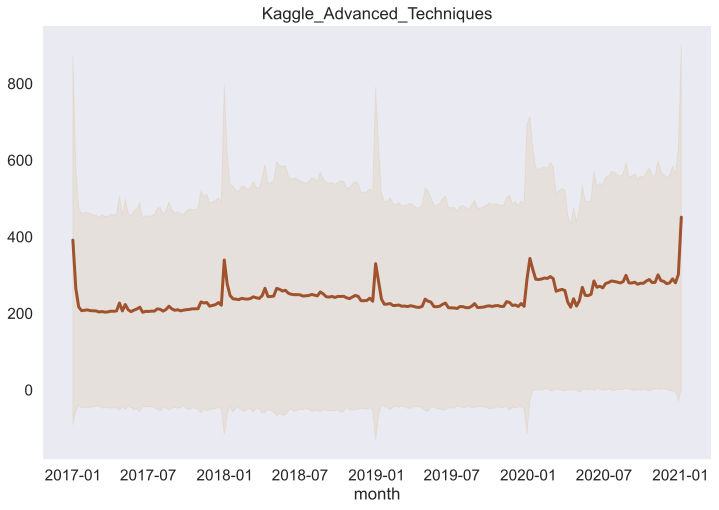

In [79]:
f, ax = plt.subplots(1,1, figsize=(12, 8))

ax.plot(series_mean, linewidth=3, color='sienna')
ax.fill_between(series_mean.index,
                (series_mean.values - 2 * series_std.values).ravel(),
                (series_mean.values + 2 * series_std.values).ravel(),
                color='darkgoldenrod', alpha=0.1)
plt.grid()
ax.set_title('Kaggle_Advanced_Techniques')
ax.set_xlabel('month')
plt.show()

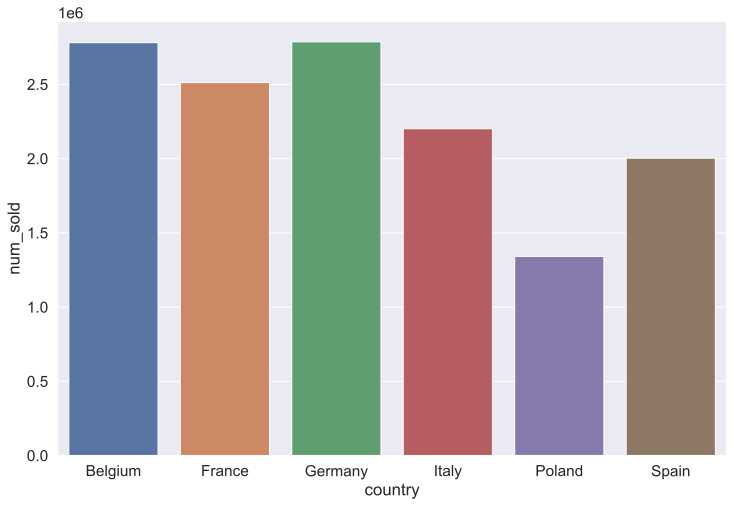

In [80]:
plt.figure(figsize=(12,8))
data=df.groupby('country').sum('num_sold')
sns.barplot(data=data, x=data.index, y='num_sold')
plt.show()

In [81]:
data1=df.groupby(['product', 'country']).sum('num_sold').unstack()
data1.drop(['year', 'month'], axis=1, inplace=True)
data1

num_sold                                  \
country                           Belgium  France Germany   Italy  Poland   
product                                                                     
Kaggle Advanced Techniques         798840  722271  800443  633025  384302   
Kaggle Getting Started             640927  578496  641336  506641  308173   
Kaggle Recipe Book                 480174  432964  481052  379221  230637   
Kaggle for Kids: One Smart Goose   861109  778588  863584  682205  418433   

                                          
country                            Spain  
product                                   
Kaggle Advanced Techniques        575029  
Kaggle Getting Started            461330  
Kaggle Recipe Book                345769  
Kaggle for Kids: One Smart Goose  621110

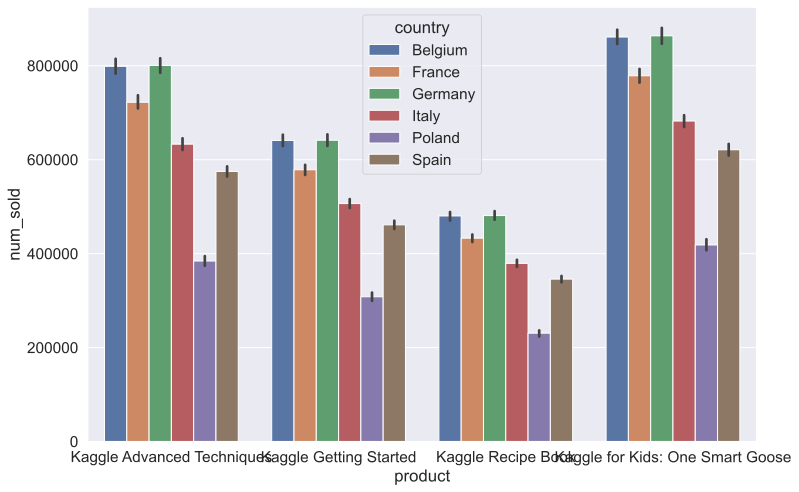

In [82]:
plt.figure(figsize=(12,8))
sns.barplot(x = "product", y = "num_sold", hue = "country", data = df, estimator=sum)
plt.show()

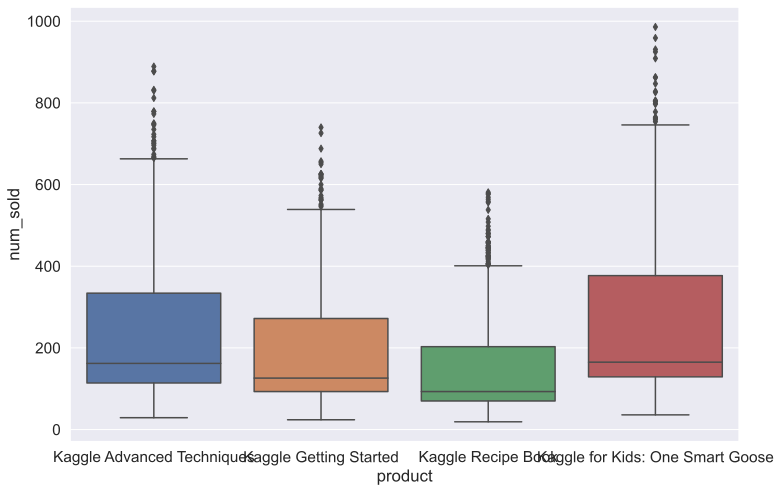

In [83]:
plt.figure(figsize=(12,8))
sns.boxplot(x='product', y='num_sold', data=df)
plt.show()

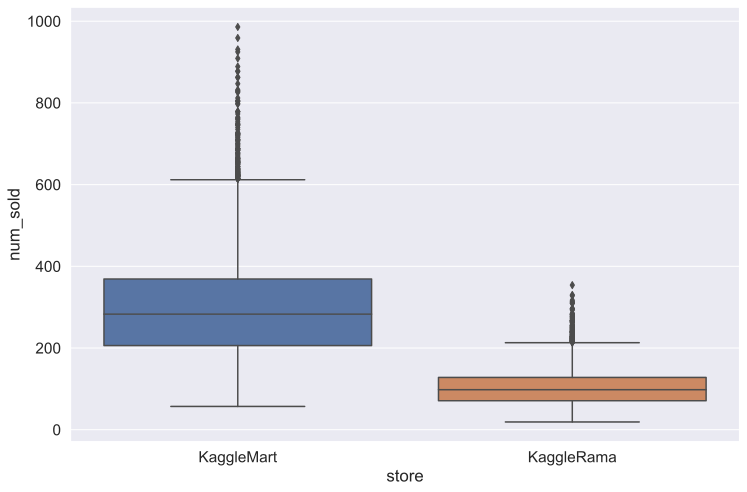

In [84]:
plt.figure(figsize=(12,8))
sns.boxplot(x='store', y='num_sold', data=df)
plt.show()

In [85]:
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.week
df['day_of_week'] = df['date'].dt.dayofweek
df["day_of_year"] = df["date"].dt.dayofyear

In [86]:
important_dates= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 124, 125, 126, 127, 140, 141, 
                167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 
                203, 230, 231, 232, 233, 234, 282, 289, 290, 307, 308, 309, 310, 311, 
                312, 313, 317, 318, 319, 320, 360, 361, 362, 363, 364, 365]
df["is_important_date"] = df["day_of_year"].apply(lambda x: 0 if x in important_dates else 1)
df['month_good'] = 1
df.loc[(df['month'] == 1) | (df['month'] == 12), 'month_good'] = 0
df['day_good'] = 0
df.loc[df['day'] != 31, 'day_good'] = 1
df['week_good'] = 1
df.loc[(df['week'] == 1) | (df['week'] > 51), 'week_good'] = 0

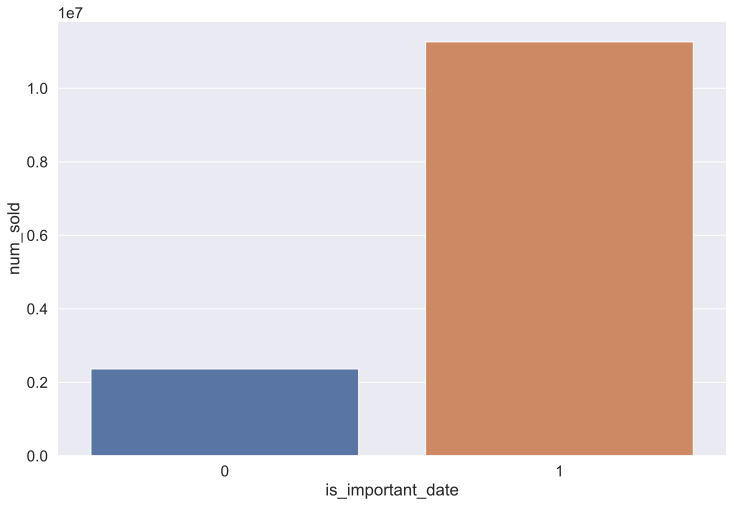

In [87]:
plt.figure(figsize=(12,8))
data=df.groupby('is_important_date').sum('num_sold')
sns.barplot(data=data, x=data.index, y='num_sold')
plt.show()

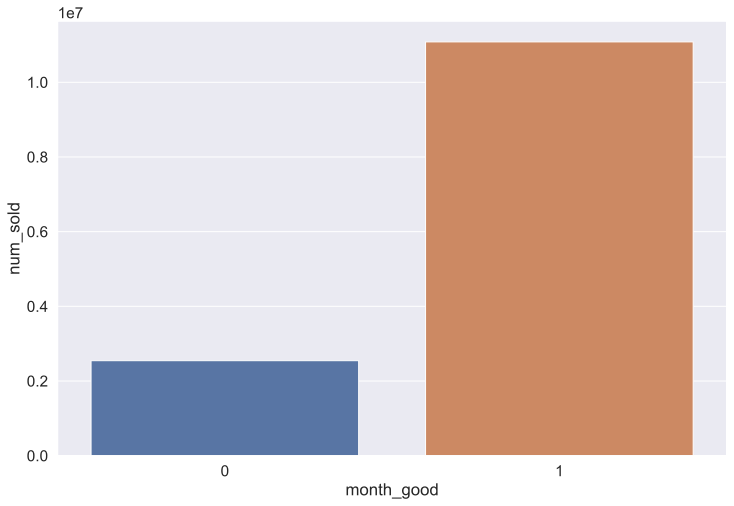

In [88]:
plt.figure(figsize=(12,8))
data=df.groupby('month_good').sum('num_sold')
sns.barplot(data=data, x=data.index, y='num_sold')
plt.show()

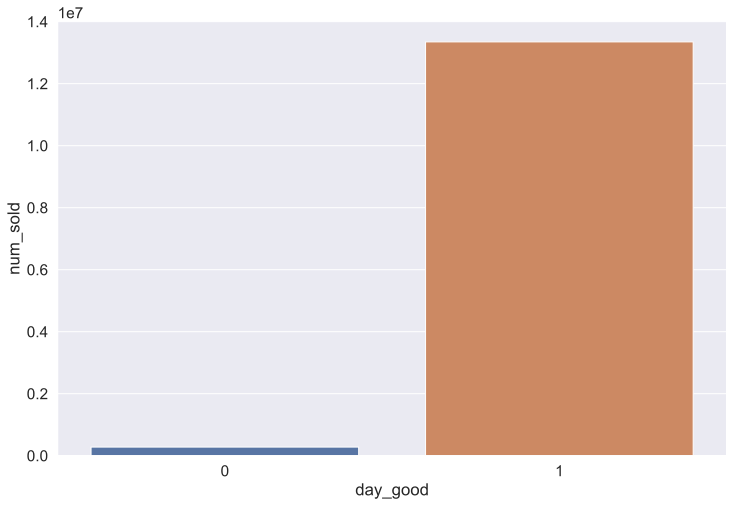

In [89]:
plt.figure(figsize=(12,8))
data=df.groupby('day_good').sum('num_sold')
sns.barplot(data=data, x=data.index, y='num_sold')
plt.show()

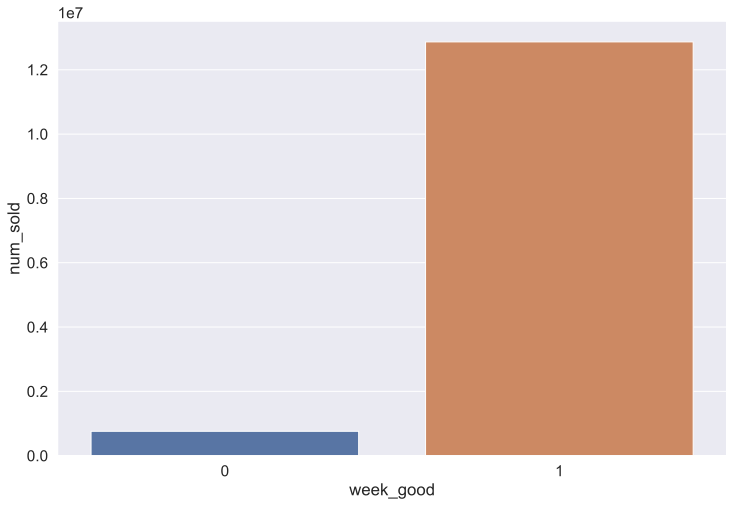

In [90]:
plt.figure(figsize=(12,8))
data=df.groupby('week_good').sum('num_sold')
sns.barplot(data=data, x=data.index, y='num_sold')
plt.show()

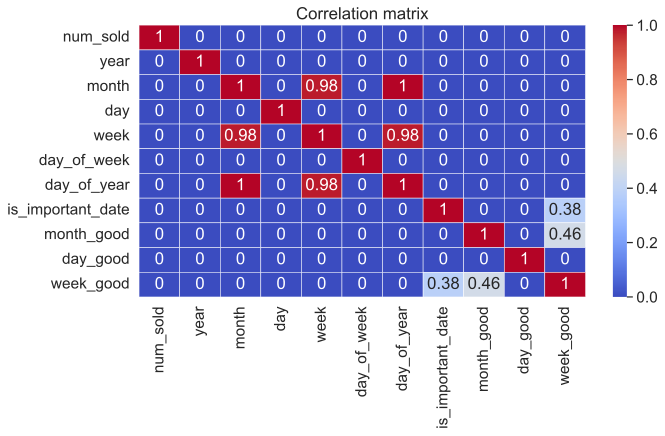

In [91]:
plt.figure(figsize=(10, 5))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()